<div style="font-family: monospace; white-space: pre; font-size: 10px;">
-> MMMMMMMM               MMMMMMMMEEEEEEEEEEEEEEEEEEEEEEDDDDDDDDDDDDD      RRRRRRRRRRRRRRRRR   IIIIIIIIII  
-> M:::::::M             M:::::::ME::::::::::::::::::::ED::::::::::::DDD   R::::::::::::::::R  I::::::::I  
-> M::::::::M           M::::::::ME::::::::::::::::::::ED:::::::::::::::DD R::::::RRRRRR:::::R I::::::::I  
-> M:::::::::M         M:::::::::MEE::::::EEEEEEEEE::::EDDD:::::DDDDD:::::DRR:::::R     R:::::RII::::::II  
-> M::::::::::M       M::::::::::M  E:::::E       EEEEEE  D:::::D    D:::::D R::::R     R:::::R  I::::I  
-> M:::::::::::M     M:::::::::::M  E:::::E               D:::::D     D:::::DR::::R     R:::::R  I::::I  
-> M:::::::M :::M   M:::::M :::::M  E::::::EEEEEEEEEE     D:::::D     D:::::DR::::RRRRRR:::::R   I::::I  
-> M::::::M M::::M M::::M M::::::M  E:::::::::::::::E     D:::::D     D:::::DR:::::::::::::RR    I::::I  
-> M::::::M  M::::M :::M  M::::::M  E:::::::::::::::E     D:::::D     D:::::DR::::RRRRRR:::::R   I::::I  
-> M::::::M   M:::::::M   M::::::M  E::::::EEEEEEEEEE     D:::::D     D:::::DR::::R     R:::::R  I::::I  
-> M::::::M    M:::::M    M::::::M  E:::::E               D:::::D     D:::::DR::::R     R:::::R  I::::I  
-> M::::::M     MM:MM     M::::::M  E:::::E       EEEEEE  D:::::D    D:::::D R::::R     R:::::R  I::::I  
-> M::::::M      MMM      M::::::MEE::::::EEEEEEEE:::::EDDD:::::DDDDD:::::DRR:::::R     R:::::RII::::::II  
-> M::::::M       M       M::::::ME::::::::::::::::::::ED:::::::::::::::DD R::::::R     R:::::RI::::::::I  
-> M::::::M               M::::::ME::::::::::::::::::::ED::::::::::::DDD   R::::::R     R:::::RI::::::::I  
-> MMMMMMMM               MMMMMMMMEEEEEEEEEEEEEEEEEEEEEEDDDDDDDDDDDDD      RRRRRRRR     RRRRRRRIIIIIIIIII
->                                                                                                       &copy;
<!-- Thanks to https://patorjk.com/ for the ASCII artwork -->
</div>

---
# Sentiment Analysis with Support Vector Machines
Welcome to the Sentiment Analysis Course! In this exciting journey, we will explore the fascinating world of understanding emotions through text. Sentiment analysis, also known as opinion mining, empowers us to decipher the sentiments, attitudes, and opinions expressed in written communication. Whether you're interested in social media analysis, customer feedback evaluation, or gaining deeper insights into human behavior, this course will equip you with the essential tools and techniques to effectively analyze sentiment. Let's dive in and unlock the power of sentiment analysis together!

---

---
# Sentiment Analysis with Support Vector Machines
Welcome to the Sentiment Analysis Course! In this exciting journey, we will explore the fascinating world of understanding emotions through text. Sentiment analysis, also known as opinion mining, empowers us to decipher the sentiments, attitudes, and opinions expressed in written communication. Whether you're interested in social media analysis, customer feedback evaluation, or gaining deeper insights into human behavior, this course will equip you with the essential tools and techniques to effectively analyze sentiment. Let's dive in and unlock the power of sentiment analysis together!

---

## Importing Relevant Packages

In [137]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from gensim.parsing.preprocessing import remove_stopwords
import nltk  # Import NLTK (Natural Language Toolkit) for natural language processing tasks
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, LancasterStemmer
from nltk.stem.snowball import EnglishStemmer
import matplotlib.pyplot as plt  # Import Matplotlib for data visualization
import pandas  as pd # Import Pandas for data manipulation and analysis
import numpy as np # Import Numpy for math
import re
import os
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kmedr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kmedr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Data Loading and Preprocessing

### Data Loading

In [138]:
# Checking the current working directory
os.getcwd()

'c:\\Users\\kmedr\\My Drive\\Sentiment_Analysis_Omdena\\Codeing'

In [139]:
# Load the preprocessed tweet dataset into a DataFrame
df = pd.read_csv('Tweets.csv')

In [140]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [141]:
df.shape

(27481, 4)

### Data Preprocessing

#### Check for Missing Values

In [142]:
null_counts = df.isnull().sum()
print(null_counts)

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64


#### Remove Missing Values

In [143]:
df = df.dropna()

In [144]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


#### Remove Unwanted Columns

In [145]:
# Drop unnecessary columns
df.drop(['textID', 'selected_text'], axis=1, inplace=True)

In [146]:
df.head(10)

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
5,http://www.dothebouncy.com/smf - some shameles...,neutral
6,2am feedings for the baby are fun when he is a...,positive
7,Soooo high,neutral
8,Both of you,neutral
9,Journey!? Wow... u just became cooler. hehe....,positive


### Create Labels

In [147]:
# from sklearn import preprocessing
# Using label_encoder to encode the column ['sentiment']
label_encoder = preprocessing.LabelEncoder()

In [148]:
# Encode labels using `label_encoder`
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

In [166]:
df = df[df['sentiment'] != 1]

In [167]:
df['sentiment'].unique()

array([0, 2])

In [168]:
df.head(10)

,text,sentiment
1,Sooo SAD I will miss you here in San Diego!!!,0
2,my boss is bullying me...,0
3,what interview! leave me alone,0
4,"Sons of ****, why couldn`t they put them on t...",0
6,2am feedings for the baby are fun when he is a...,2
9,Journey!? Wow... u just became cooler. hehe....,2
11,I really really like the song Love Story by Ta...,2
12,My Sharpie is running DANGERously low on ink,0
13,i want to go to music tonight but i lost my vo...,0
15,"Uh oh, I am sunburned",0


#### Labels
- 0 = Negative
- 2 = Positive

### StopWord Removal
Stopwords are commonly used words in a language that are often considered insignificant or lack meaningful contribution to the overall semantics of a text. These words are typically filtered out or removed during text analysis tasks, such as sentiment analysis, to focus on more important and meaningful words. Examples of stopwords in English include articles (e.g., "a", "an", "the"), pronouns (e.g., "I", "you", "he", "she"), prepositions (e.g., "in", "on", "at"), and conjunctions (e.g., "and", "but", "or"). By removing stopwords, text analysis algorithms can often improve efficiency and accuracy by eliminating noise and reducing the dimensionality of the data.
### Lowercasing
### Removing Special Characters, Mentions, Hashtags
### Tokenization(Tweets)
Tokenization is the process of breaking down a text or sentence into smaller units called tokens. These tokens can be individual words, phrases, or even characters, depending on the granularity of the tokenization technique used. Tokenization helps in preparing text data for analysis or processing by splitting it into meaningful and manageable components. It serves as a foundational step in various natural language processing (NLP) tasks, such as text classification, language modeling, and information retrieval.
### Lemmatization / Stemming (Tweets)
Lemmatization and stemming are techniques used in natural language processing to reduce words to their base or canonical forms, but they have different approaches and outcomes.
Lemmatization:
- Lemmatization aims to obtain the lemma or base form of a word.
- It considers the word's morphological analysis and applies language rules to determine the base form.
- Lemmatization typically produces valid words that are present in the language's dictionary.
- For example, the lemmatization of "running" would be "run", and the lemmatization of "better" would be "good".
Stemming:
- Stemming is a simpler and more heuristic-based approach.
- It reduces words to their stem or root form by removing suffixes or prefixes.
- Stemming does not guarantee that the resulting stem is a valid word.
- For example, the stemming of "running" would be "run", but the stemming of "better" would be "bet".
In summary, lemmatization provides linguistically accurate base forms, while stemming focuses on heuristics to derive word stems. Lemmatization tends to yield better results in terms of semantic accuracy, but it can be computationally more expensive than stemming. The choice between lemmatization and stemming depends on the specific requirements and objectives of your application or analysis.




#### Creating a single preprocessing function and applying it to the dataset
We will create a single function that will perform all the preprocessing steps we have mentioned above and apply it to the dataset.  
This will make our preprocessing pipeline more efficient and easier to replicate on other datasets.  
We will use the `re` library to perform regular expression operations.

In [169]:
def preprocess_text(text):
    # Remove mentions (@username) and hashtags (#tech)
    text = re.sub(r'@\w+|#\w+', '', text)
    
    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # remove extra whitespace
    text = ' '.join(text.split())

    # Removing stopwords and convert the text to lowercase
    text = remove_stopwords(text.lower())

    # Tokenization
    text = word_tokenize(text)

    #lemmatization
    lemma = EnglishStemmer()
    text = ' '.join([lemma.stem(word) for word in text])
    return text

Apply the `preprocess_text` function to create a new column 'preprocessed_text'  
  
We will also take the opportunity to create a **shallow copy** of the dataframe and save it as **'df_cleaned'** for future use. 

In [170]:
df_cleaned = df.copy()
df_cleaned['preprocessed_text'] = df_cleaned['text'].apply(preprocess_text)
df_cleaned.head()

,text,sentiment,preprocessed_text
1,Sooo SAD I will miss you here in San Diego!!!,0,sooo sad miss san diego
2,my boss is bullying me...,0,boss bulli
3,what interview! leave me alone,0,interview leav
4,"Sons of ****, why couldn`t they put them on t...",0,son releas bought
6,2am feedings for the baby are fun when he is a...,2,2am feed babi fun smile coo


In [171]:
## Dropping the previous text column because it has now become redundant.
df_cleaned.drop('text', axis=1, inplace=True)
df_cleaned.head()

,sentiment,preprocessed_text
1,0,sooo sad miss san diego
2,0,boss bulli
3,0,interview leav
4,0,son releas bought
6,2,2am feed babi fun smile coo


## Model Building

First we need to convert the labels for the training and test sets into a format that the model can interpret.

In [172]:
# Convert sentiment labels to numeric values (0 = negative, 1 = neutral, 2 = positive)
df_cleaned['sentiment'] = df_cleaned['sentiment'].map({0: 'negative', 2: 'positive'})

In [173]:
df_cleaned.head()

,sentiment,preprocessed_text
1,negative,sooo sad miss san diego
2,negative,boss bulli
3,negative,interview leav
4,negative,son releas bought
6,positive,2am feed babi fun smile coo


### Train Test Validate
Here we will create the train, test and validate datasets.

In [174]:
# Split the dataset into train, validation, and test sets
X = df_cleaned['preprocessed_text']
y = df_cleaned['sentiment']

In [177]:
# Train-Validation-Test Split
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42)

In [178]:
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((10472,), (3273,), (2618,), (10472,), (3273,), (2618,))

### Feature Extraction

#### Vectorization

In [179]:
# Feature Extraction: TF-IDF
vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)

In [180]:
# Transform the validation set using the vectorizer
X_val_vectors = vectorizer.transform(X_val)

#### Modelling

In [181]:
# Train a Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000) # Increase the max_iter value as needed
logreg_model.fit(X_train_vectors, y_train)

LogisticRegression(max_iter=1000)

In [182]:
# Perform prediction on the validation set
y_val_pred = logreg_model.predict(X_val_vectors)

In [183]:
# Evaluate the model on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='weighted')
recall = recall_score(y_val, y_val_pred, average='weighted')
f1 = f1_score(y_val, y_val_pred, average='weighted')

In [184]:
# Print validation set metrics
print("Validation Set Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Validation Set Metrics:
Accuracy: 0.8705118411000764
Precision: 0.8705081767088205
Recall: 0.8705118411000764
F1-score: 0.8705068325194134


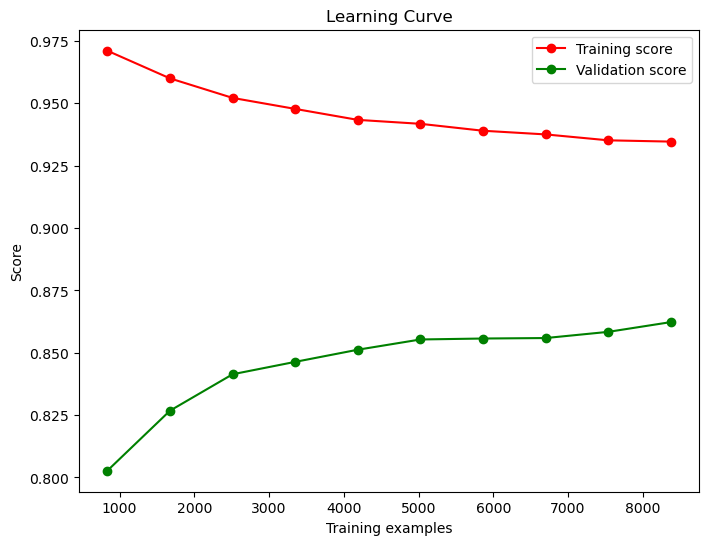

In [185]:
# Generate learning curve
train_sizes, train_scores, val_scores = learning_curve(logreg_model, X_train_vectors, y_train,
                                                    cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', color="g", label="Validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

# Transform the test set using the vectorizer
X_test_vectors = vectorizer.transform(X_test)

# Perform prediction on the test set
y_test_pred = logreg_model.predict(X_test_vectors)


In [ ]:
# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

In [ ]:
# Print test set metrics
print("\nTest Set Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)